## sklearn.neighbors.KNeighborsClassifier
`sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)`

- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.


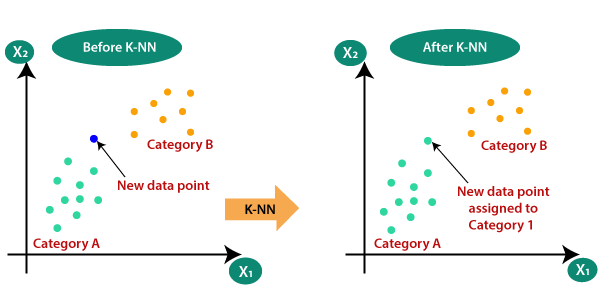


Now, we will make simple Classifier with KNN that someone likes Pizza or not based on their age.<br>
Likes Pizza - 1<br>
Does not like Pizza - 0

Note- This is a fake data

It is obvious that Old people don't like Pizza (generally!) and young people like to eat Pizza!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### Setting Style of matplotlib
from matplotlib import style
style.use('seaborn')

In [2]:
X = np.array([10, 17, 22, 25, 30, 32, 39, 45, 77, 80, 91, 85, 97, 80, 65]).reshape(-1, 1) # AGE
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

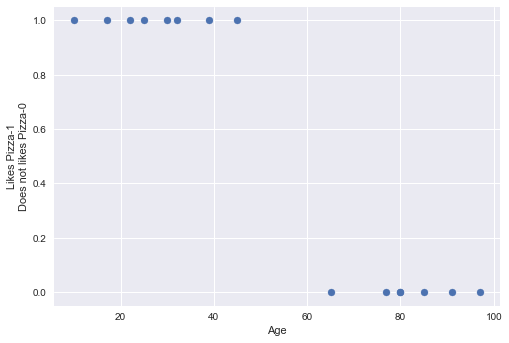

In [3]:
plt.scatter(X, y)
plt.xlabel("Age")
plt.ylabel("Likes Pizza-1\nDoes not likes Pizza-0")
plt.show()

Let's tackle this problem with K-Nearest Neighbour!

In [4]:
clf = KNeighborsClassifier()
clf.fit(X, y)

KNeighborsClassifier()

In [5]:
clf.predict([[16]])

array([1])

For Age 16, model is predicting it likes pizza and according to our imaginary data it is correct that a 16 year old will like pizza!

In [6]:
clf.predict_proba([[12]])

array([[0., 1.]])

KNN is based on the assumption that similar things are close to each other! 
Here, K means the number of neighbours to check for..
In sklearn, default k is 5. So, it will check for 5 nearest neighbour and vote for the highest number of classes. In our example, if sklearn finds 3 neighbours who like pizza and 2 neighbour who doesn't so here highest number of class is "Who like Pizza" so it is obvious that given person also likes pizza!

Now, Let us play with some real world data...

## Tumour Detection with KNN

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
df = load_breast_cancer()

In [9]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
X = df.data
y = df.target

In [12]:
X.shape

(569, 30)

In [13]:
y.shape

(569,)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [15]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [16]:
print(y_train.shape, y_test.shape)

(455,) (114,)


In [17]:
clf2 = KNeighborsClassifier(n_neighbors=21)
clf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [18]:
clf.classes_

array([0, 1])

Which corresponds to ['malignant', 'benign']<br>
malignant - 0<br>
Benign - 1

In [19]:
clf2.effective_metric_

'euclidean'

In [20]:
y_pred = clf2.predict(X_test)

Let's compare the Predicted values with real values!

In [21]:
clf2.score(X_test, y_test)

0.9736842105263158

That's pretty nice accuracy!

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[41  3]
 [ 0 70]]


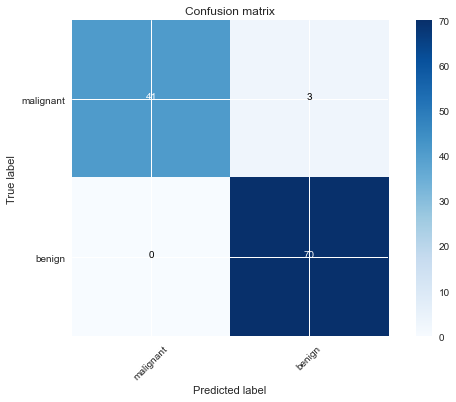

In [23]:
from PCM.PCM import plot_confusion_matrix

plot_confusion_matrix(cm, classes=df.target_names)

Our model has predicted only 2 malignant tumour as benign and else all samples correctly!

## Testing This Data With Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logit_reg = LogisticRegression()
logit_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
logit_reg.score(X_test, y_test)

0.9912280701754386

It gives same accuracy!

## Let's see what is happening Under the Hood

### Making KNN Classifier from scratch

In [27]:
import numpy as np

class KNNClassifier:

    def __init__(self, n_neighbours='auto', p=2):
        self.n_neighbours = n_neighbours
        self.p = p # order of norm
    
    def fit(self, X, y):
        self.X = X
        self.y = y

        if self.n_neighbours == 'auto': # if n_neighbours='auto' it automatically finds correct n_neighbours acc. to your data
            self.n_neighbours = int(np.sqrt(len(self.X)))
            if self.n_neighbours % 2 != 0:
                self.n_neighbours += 1

    
    def predict(self, X):
        predictions = []
        for pred_row in X:
            euclidean_distances = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                euclidean_distances.append(distance)
            
            indices = np.argsort(euclidean_distances)[:self.n_neighbours]
            neighbours = self.y[indices]
            coefs = [self.X[indices], self.y[indices]]
            prediction = np.argmax(np.bincount(neighbours))
            predictions.append(prediction)

        predictions = np.array(predictions)
        return predictions, neighbours, coefs

### Making a dummy data

In [28]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

### Visualizing our dummy data

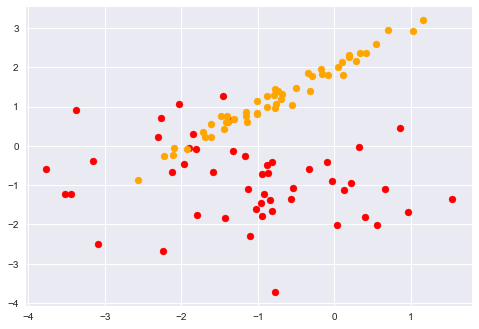

In [29]:
plt.scatter(X[np.where(y == 0)][:, 0], X[np.where(y == 0)][:, 1], color='red')
plt.scatter(X[np.where(y == 1)][:, 0], X[np.where(y == 1)][:, 1], color='orange')
plt.show()

### train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Fitting our data and making Predictions

In [31]:
knn = KNNClassifier(n_neighbours=5)
knn.fit(X, y)

In [32]:
knn.n_neighbours

5

In [33]:
pred, _, _ = knn.predict(X_test)

In [34]:
pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [35]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

### Checking Accuracy

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, pred)

0.9

In [38]:
X_test[10]

array([ 0.55893733, -2.0168051 ])

### Visualizing n-neighbours of 10th data point in our test set

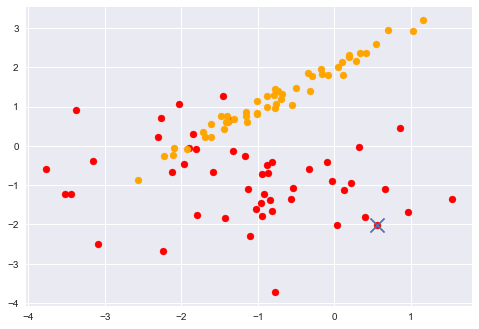

In [39]:
plt.scatter(X[np.where(y == 0)][:, 0], X[np.where(y == 0)][:, 1], color='red')
plt.scatter(X[np.where(y == 1)][:, 0], X[np.where(y == 1)][:, 1], color='orange')
plt.scatter(X_test[10][0], X_test[10][1], marker='x', s=200)
plt.show()

In [40]:
pred, neighbours, coefs = knn.predict(np.expand_dims(X_test[10], axis=0))
print("Final Prediction:", pred)
print("Neighbours:", neighbours)
print("Coefficients:\n", coefs)

Final Prediction: [0]
Neighbours: [0 0 0 0 0]
Coefficients:
 [array([[ 0.55893733, -2.0168051 ],
       [ 0.39747262, -1.82237472],
       [ 0.95817687, -1.68111971],
       [ 0.03544744, -2.01297423],
       [ 0.66587906, -1.09206153]]), array([0, 0, 0, 0, 0])]


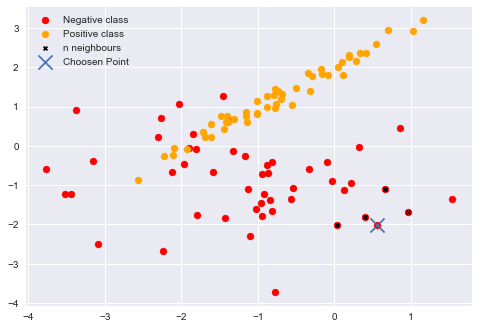

In [41]:
plt.scatter(X[np.where(y == 0)][:, 0], X[np.where(y == 0)][:, 1], color='red', label='Negative class')
plt.scatter(X[np.where(y == 1)][:, 0], X[np.where(y == 1)][:, 1], color='orange', label='Positive class')
plt.scatter(coefs[0][:, 0], coefs[0][:, 1], color='black', marker='x', s=15, label='n neighbours')
plt.scatter(X_test[10][0], X_test[10][1], marker='x', s=200, label='Choosen Point')
plt.legend()
plt.show()

In [42]:
pred, neighbours, coefs = knn.predict(X[-1])
print("Final Prediction:", pred)
print("Neighbours:", neighbours)
print("Coefficients:\n", coefs)

Final Prediction: [1 1]
Neighbours: [1 1 1 1 1]
Coefficients:
 [array([[1.15354602, 3.19128357],
       [1.02369385, 2.91761024],
       [0.70101383, 2.94258516],
       [0.54660097, 2.58059711],
       [0.41228357, 2.37044324]]), array([1, 1, 1, 1, 1])]


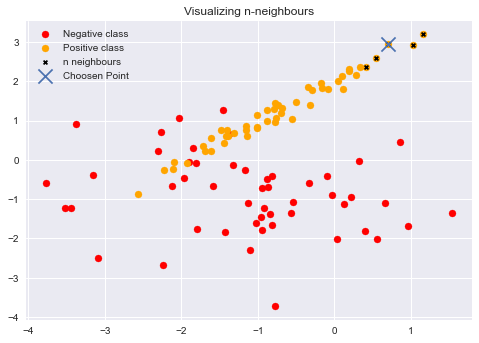

In [43]:
plt.title('Visualizing n-neighbours')
plt.scatter(X[np.where(y == 0)][:, 0], X[np.where(y == 0)][:, 1], color='red', label='Negative class')
plt.scatter(X[np.where(y == 1)][:, 0], X[np.where(y == 1)][:, 1], color='orange', label='Positive class')
plt.scatter(coefs[0][:, 0], coefs[0][:, 1], color='black', marker='x', s=15, label='n neighbours')
plt.scatter(X[-1][0], X[-1][1], marker='x', s=200, label='Choosen Point')
plt.legend()
plt.show()

In [44]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print(x_min, x_max, y_min, y_max)

-4.770925407620515 2.535822367243753 -4.726424642124253 4.191283569023398


In [45]:
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [46]:
xx

array([[-4.77092541, -4.67092541, -4.57092541, ...,  2.32907459,
         2.42907459,  2.52907459],
       [-4.77092541, -4.67092541, -4.57092541, ...,  2.32907459,
         2.42907459,  2.52907459],
       [-4.77092541, -4.67092541, -4.57092541, ...,  2.32907459,
         2.42907459,  2.52907459],
       ...,
       [-4.77092541, -4.67092541, -4.57092541, ...,  2.32907459,
         2.42907459,  2.52907459],
       [-4.77092541, -4.67092541, -4.57092541, ...,  2.32907459,
         2.42907459,  2.52907459],
       [-4.77092541, -4.67092541, -4.57092541, ...,  2.32907459,
         2.42907459,  2.52907459]])

In [47]:
yy

array([[-4.72642464, -4.72642464, -4.72642464, ..., -4.72642464,
        -4.72642464, -4.72642464],
       [-4.62642464, -4.62642464, -4.62642464, ..., -4.62642464,
        -4.62642464, -4.62642464],
       [-4.52642464, -4.52642464, -4.52642464, ..., -4.52642464,
        -4.52642464, -4.52642464],
       ...,
       [ 3.97357536,  3.97357536,  3.97357536, ...,  3.97357536,
         3.97357536,  3.97357536],
       [ 4.07357536,  4.07357536,  4.07357536, ...,  4.07357536,
         4.07357536,  4.07357536],
       [ 4.17357536,  4.17357536,  4.17357536, ...,  4.17357536,
         4.17357536,  4.17357536]])

In [48]:
print(xx.shape, yy.shape)

(90, 74) (90, 74)


In [49]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

In [50]:
Z[0]

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

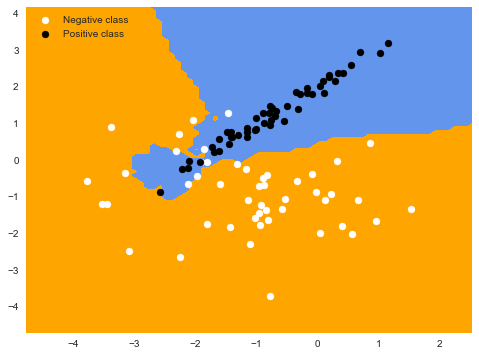

In [51]:
from matplotlib.colors import ListedColormap
style.use('seaborn')
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z[0].reshape(xx.shape), cmap=ListedColormap(['orange', 'cornflowerblue']))
plt.scatter(X[np.where(y == 0)][:, 0], X[np.where(y == 0)][:, 1], color='white', label='Negative class')
plt.scatter(X[np.where(y == 1)][:, 0], X[np.where(y == 1)][:, 1], color='black', label='Positive class')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## With Sklearn

In [52]:
clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(X, y)
pred_sk = clf3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_sk))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

Accuracy: 0.9


Same Accuracy as ours!

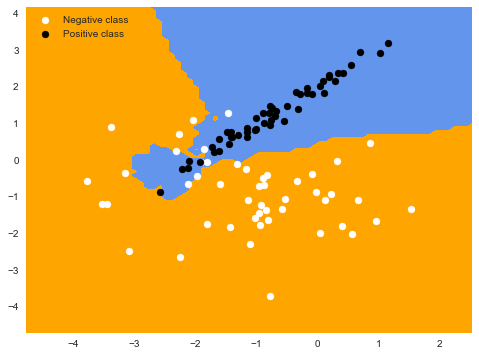

In [53]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=ListedColormap(['orange', 'cornflowerblue']))
plt.scatter(X[np.where(y == 0)][:, 0], X[np.where(y == 0)][:, 1], color='white', label='Negative class')
plt.scatter(X[np.where(y == 1)][:, 0], X[np.where(y == 1)][:, 1], color='black', label='Positive class')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()